In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install seaborn --upgrade


In [20]:
%%capture
!pip install cartopy


In [21]:
data_raw=pd.read_csv("Datos de un año - QV San Isidro.csv", sep=";")

In [22]:
data_raw.head(3)

,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura
0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3
1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3
2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3


In [23]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231785 entries, 0 to 231784
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Fecha        231785 non-null  object 
 1   Hora         231785 non-null  object 
 2   Direccion    231782 non-null  float64
 3   Velocidad    170398 non-null  float64
 4   Racha        170398 non-null  float64
 5   Presion      170400 non-null  float64
 6   Temperatura  170401 non-null  float64
dtypes: float64(5), object(2)
memory usage: 12.4+ MB


In [24]:
#los nulos corresponden a mediciones de marea que estan intercalados
data=data_raw.dropna(axis=0)
data.reset_index(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170398 entries, 0 to 170397
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        170398 non-null  int64  
 1   Fecha        170398 non-null  object 
 2   Hora         170398 non-null  object 
 3   Direccion    170398 non-null  float64
 4   Velocidad    170398 non-null  float64
 5   Racha        170398 non-null  float64
 6   Presion      170398 non-null  float64
 7   Temperatura  170398 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 10.4+ MB


In [26]:
data.head(3)

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3


### CAMPOS DE FECHA

In [27]:
data.loc[:,"Time"]=data.loc[:,"Fecha"]+" "+data.loc[:,"Hora"]

/Users/cristina/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/cristina/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [28]:
data.loc[:,"Time"]=pd.to_datetime(data.Time, format="%d/%m/%y %H:%M:%S" )
#format="%d/%m/%Y"
#infer_datetime_format=True
#

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170398 entries, 0 to 170397
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        170398 non-null  int64         
 1   Fecha        170398 non-null  object        
 2   Hora         170398 non-null  object        
 3   Direccion    170398 non-null  float64       
 4   Velocidad    170398 non-null  float64       
 5   Racha        170398 non-null  float64       
 6   Presion      170398 non-null  float64       
 7   Temperatura  170398 non-null  float64       
 8   Time         170398 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 11.7+ MB


In [30]:
data.head()

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3,2020-09-23 13:38:58
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3,2020-09-23 13:56:47
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3,2020-09-23 13:59:28
3,3,23/9/20,14:01:57,282.0,9.10,16.0,1020.22,21.1,2020-09-23 14:01:57
4,4,23/9/20,14:04:33,164.0,5.60,10.0,1020.25,21.1,2020-09-23 14:04:33


In [31]:
#defaso una copia de Time para calcular el delta entre filas
data.loc[:,"Time_shift_1"]=data.loc[:,"Time"].shift()

/Users/cristina/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/cristina/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [32]:
data.head(3)

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3,2020-09-23 13:38:58,NaT
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3,2020-09-23 13:56:47,2020-09-23 13:38:58
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3,2020-09-23 13:59:28,2020-09-23 13:56:47


In [33]:
#calculo el delta
data.loc[:,"Time_delta_1"]=(data.loc[:,"Time"]-data.loc[:,"Time_shift_1"])
data

/Users/cristina/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/cristina/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1,Time_delta_1
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3,2020-09-23 13:38:58,NaT,NaT
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3,2020-09-23 13:56:47,2020-09-23 13:38:58,0 days 00:17:49
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3,2020-09-23 13:59:28,2020-09-23 13:56:47,0 days 00:02:41
3,3,23/9/20,14:01:57,282.0,9.10,16.0,1020.22,21.1,2020-09-23 14:01:57,2020-09-23 13:59:28,0 days 00:02:29
4,4,23/9/20,14:04:33,164.0,5.60,10.0,1020.25,21.1,2020-09-23 14:04:33,2020-09-23 14:01:57,0 days 00:02:36
...,...,...,...,...,...,...,...,...,...,...,...
170393,231769,16/9/21,13:21:24,100.0,6.97,9.0,1025.55,16.3,2021-09-16 13:21:24,2021-09-16 13:18:40,0 days 00:02:44
170394,231770,16/9/21,13:24:07,95.0,6.53,7.0,1025.52,16.4,2021-09-16 13:24:07,2021-09-16 13:21:24,0 days 00:02:43
170395,231772,16/9/21,13:26:49,81.0,8.10,10.0,1025.40,16.4,2021-09-16 13:26:49,2021-09-16 13:24:07,0 days 00:02:42
170396,231774,16/9/21,13:29:33,78.0,10.37,12.0,1025.30,16.2,2021-09-16 13:29:33,2021-09-16 13:26:49,0 days 00:02:44


In [34]:
data.head(3)

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1,Time_delta_1
0,0,23/9/20,13:38:58,268.0,0.07,2.0,1020.51,21.3,2020-09-23 13:38:58,NaT,NaT
1,1,23/9/20,13:56:47,277.0,1.40,14.0,1020.22,21.3,2020-09-23 13:56:47,2020-09-23 13:38:58,0 days 00:17:49
2,2,23/9/20,13:59:28,282.0,3.50,14.0,1020.25,21.3,2020-09-23 13:59:28,2020-09-23 13:56:47,0 days 00:02:41


In [35]:
data.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Time_delta_1
count,170398.000000,170398.000000,170398.000000,170398.000000,170398.000000,170398.000000,170397
mean,113196.814317,158.623039,9.921488,11.895404,1013.910620,17.086808,0 days 00:03:01.521951677
std,68457.729541,95.212042,5.503845,6.445309,50.356043,5.688869,0 days 00:28:00.684502303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:19
25%,52360.500000,84.000000,5.700000,7.000000,1012.120000,12.700000,0 days 00:02:40
50%,113196.000000,135.000000,9.070000,11.000000,1015.690000,17.700000,0 days 00:02:42
75%,172766.750000,234.000000,13.200000,16.000000,1019.610000,21.400000,0 days 00:02:44
max,231776.000000,360.000000,38.670000,105.000000,10013.500000,32.300000,7 days 01:30:20


### ANALIZO LA DIFERENCIA DE TIEMPO DE LAS MEDICIONES

In [36]:
#establezco los cortes
delay_5min=pd.Timedelta("00:05:00")
delay_1hour=pd.Timedelta("00:60:00")
delay_1day=pd.Timedelta("24:00:00")

In [37]:
#selecciono los que tienen mas de 5 minutos y menos de 1 hora
delay_over_5=data[(data["Time_delta_1"]> delay_5min) & (data["Time_delta_1"]< delay_1hour)]
delay_over_5.Time_delta_1.describe()

count                         6909
mean     0 days 00:06:05.377623389
std      0 days 00:03:37.124224227
min                0 days 00:05:01
25%                0 days 00:05:20
50%                0 days 00:05:24
75%                0 days 00:05:29
max                0 days 00:58:32
Name: Time_delta_1, dtype: object

In [38]:
#selecciono los que tienen mas de 1 homra y menos de 1 dia
delay_over_1h=data[(data["Time_delta_1"]> delay_1hour)& (data["Time_delta_1"]< delay_1day)]
delay_over_1h.Time_delta_1.describe()

count                           39
mean     0 days 02:23:20.743589743
std      0 days 02:55:15.778267161
min                0 days 01:00:01
25%                0 days 01:07:12
50%                0 days 01:26:05
75%                0 days 02:12:41
max                0 days 14:30:29
Name: Time_delta_1, dtype: object

In [39]:
#selecciono los que tienen mas de 1 dia
delay_over_1day=data[data["Time_delta_1"]> delay_1day]
delay_over_1day.Time_delta_1.describe()

count                            3
mean     4 days 02:09:11.666666666
std      2 days 13:57:56.693879780
min                2 days 09:51:08
25%         2 days 14:28:37.500000
50%                2 days 19:06:07
75%         4 days 22:18:13.500000
max                7 days 01:30:20
Name: Time_delta_1, dtype: object

In [40]:
delay_over_1day

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1,Time_delta_1
47282,59440,31/12/20,12:14:59,229.0,0.0,0.0,0.00,0.0,2020-12-31 12:14:59,2020-12-28 17:08:52,2 days 19:06:07
52863,68616,18/1/21,13:30:40,62.0,10.9,13.0,0.00,0.0,2021-01-18 13:30:40,2021-01-11 12:00:20,7 days 01:30:20
168038,228502,11/9/21,15:44:24,61.0,11.6,13.0,1013.93,16.1,2021-09-11 15:44:24,2021-09-09 05:53:16,2 days 09:51:08


In [41]:
data.iloc[47281:47284]

,index,Fecha,Hora,Direccion,Velocidad,Racha,Presion,Temperatura,Time,Time_shift_1,Time_delta_1
47281,58848,28/12/20,17:08:52,122.0,17.63,20.0,1009.4,26.6,2020-12-28 17:08:52,2020-12-28 17:06:07,0 days 00:02:45
47282,59440,31/12/20,12:14:59,229.0,0.00,0.0,0.0,0.0,2020-12-31 12:14:59,2020-12-28 17:08:52,2 days 19:06:07
47283,59441,31/12/20,12:17:59,228.0,0.00,0.0,0.0,0.0,2020-12-31 12:17:59,2020-12-31 12:14:59,0 days 00:03:00


In [42]:
#elimino los registros con delay de mas de una hora y de mas de 1 dias y recalculo la media y el desvio std para saber cual es la frecuencia de las mediciones

#selecciono los que tienen menos de 5 minutos 
delay_below_5=data[(data["Time_delta_1"]< delay_5min) ]
delay_below_5.Time_delta_1.describe()


count                       163443
mean     0 days 00:02:45.256499207
std      0 days 00:00:14.577643061
min                0 days 00:00:19
25%                0 days 00:02:40
50%                0 days 00:02:42
75%                0 days 00:02:44
max                0 days 00:04:59
Name: Time_delta_1, dtype: object

<div class="alert-warning"> 
Sacando lo que podrían ser errores en la medicion, el 95% de los registros tienen una media en la medicion de los datos de 2minutos 45 segundos,

con un desvio de 14 segundos
    
El 75% de los datos tiene una frecuencia de medicion de 2minutos 44 sgegundos, y el valor max es de 4 minutos 59 segundos

</div>  


### AGREGAMOS DATOS DE LAS ESTACIONES PARA VER SI PODEMOS ENCONTRA MAYOR CORRELACION

In [43]:
#separo la informacion de los meses
data.loc[:,"Mes"]=data.loc[:,"Time"].dt.month

/Users/cristina/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/cristina/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [44]:
#identifico las estaciones de acuerdo a los meses
data.loc[:,"Estacion"]=data.loc[:,"Mes"]
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==9 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==10 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==11 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Verano" if x==12 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Verano" if x==1 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Verano" if x==2 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Otono" if x==3 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Otono" if x==4 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Otono" if x==5 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==6 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==7 else x)
data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==8 else x)


#data.loc[:,"Estacion"]=data.loc[:,"Estacion"].apply(lambda x: "Verano" if x>=12 & x<3 else x)

In [45]:
data["Estacion"].value_counts()

Invierno     45516
Otono        44561
Verano       40395
Primavera    39926
Name: Estacion, dtype: int64

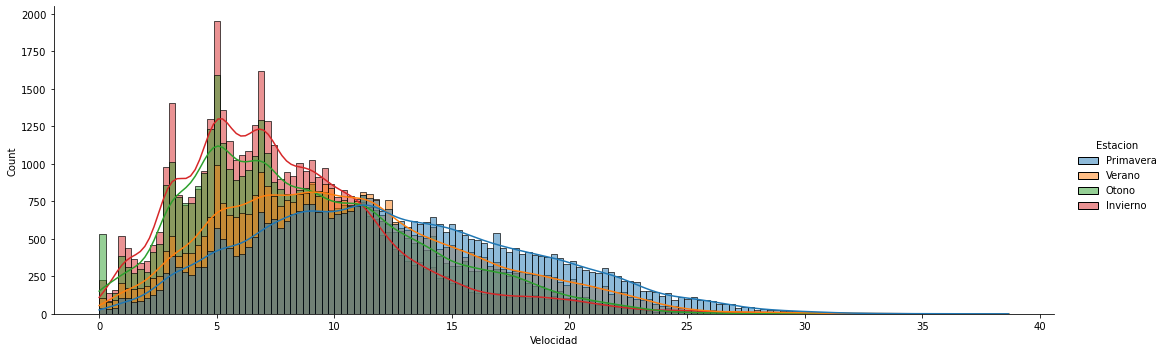

In [46]:

sns.displot(x=data.Velocidad, kde=True, hue=data["Estacion"], aspect=30/10)


In [47]:
data.Velocidad.mean()

9.921487928262069

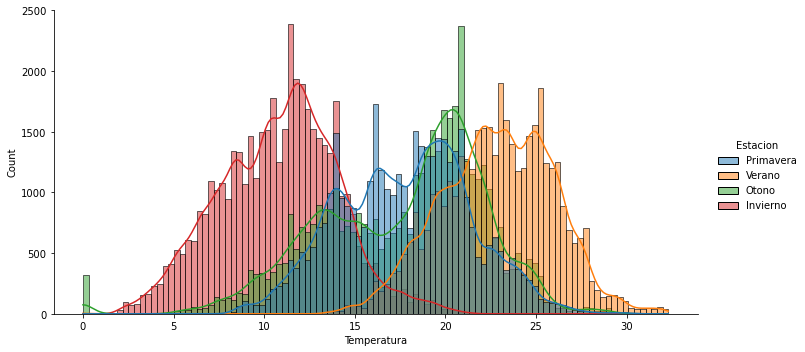

In [48]:
sns.displot(x=data.Temperatura, kde=True, hue=data["Estacion"], aspect=20/10)


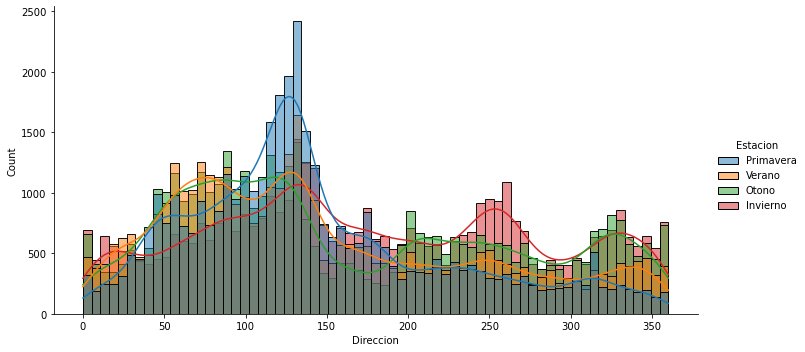

In [49]:
sns.displot(x=data.Direccion, kde=True, hue=data["Estacion"], aspect=20/10)


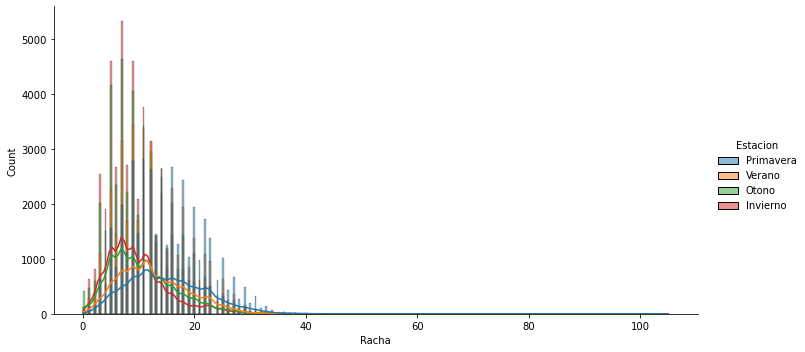

In [50]:
sns.displot(x=data.Racha, kde=True, hue=data["Estacion"], aspect=20/10)


In [51]:
#sns.displot(x=data.Presion, kde=True, hue=data["Estacion"], aspect=20/10)
#este grafico tarda mucho con toda la base, volver a correr con data_15 min

In [52]:
data.groupby(by="Estacion")["Velocidad"].mean()

Estacion
Invierno      8.052577
Otono         8.790699
Primavera    12.622144
Verano       10.605434
Name: Velocidad, dtype: float64

HORARIO NAVEGABLE

data["Hora"]=data["Time"].dt.hour
data["Hora"]

data["Horario_navegable"]=np.nan
data["Horario_navegable"]

for i in data.index:
    if (data.Hora.iloc[i]>=9) & (data.Hora.iloc[i]<=16):
        data.Horario_navegable.iloc[i]=1
    else:
        data.Horario_navegable.iloc[i]=0

data.Horario_navegable.value_counts()

data_horario_1=data[data.Horario_navegable==1]
data_horario_1

data_horario_1.groupby(by="Estacion")["Velocidad"].mean()

data_horario_1.groupby(by="Estacion")["Velocidad"].std()

sns.pairplot(data_15min[data_15min.Estacion=="Primavera"])

### AGRUPO LAS MEDICIONES CADA 15 MINUTOS

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170398 entries, 0 to 170397
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   index         170398 non-null  int64          
 1   Fecha         170398 non-null  object         
 2   Hora          170398 non-null  object         
 3   Direccion     170398 non-null  float64        
 4   Velocidad     170398 non-null  float64        
 5   Racha         170398 non-null  float64        
 6   Presion       170398 non-null  float64        
 7   Temperatura   170398 non-null  float64        
 8   Time          170398 non-null  datetime64[ns] 
 9   Time_shift_1  170397 non-null  datetime64[ns] 
 10  Time_delta_1  170397 non-null  timedelta64[ns]
 11  Mes           170398 non-null  int64          
 12  Estacion      170398 non-null  object         
dtypes: datetime64[ns](2), float64(5), int64(2), object(3), timedelta64[ns](1)
memory usage: 16.9+ MB


In [54]:
data_15min=data.groupby(pd.Grouper(key="Time", freq="15min")).mean()
data_15min

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes
Time,,,,,,,
2020-09-23 13:30:00,0.000000,268.000000,0.070000,2.000000,1020.510000,21.300000,9.0
2020-09-23 13:45:00,1.500000,279.500000,2.450000,14.000000,1020.235000,21.300000,9.0
2020-09-23 14:00:00,4.000000,203.333333,6.723333,12.000000,1020.230000,21.066667,9.0
2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-09-16 12:30:00,231749.000000,78.600000,7.900000,9.000000,1026.046000,16.240000,9.0
2021-09-16 12:45:00,231756.166667,82.333333,7.633333,9.000000,1025.908333,16.483333,9.0
2021-09-16 13:00:00,231763.000000,84.200000,7.154000,8.200000,1025.764000,16.640000,9.0


In [55]:
#agreo un indice, para que Time pase a ser una columna
data_15min.reset_index(drop=False, inplace=True)
data_15min

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes
0,2020-09-23 13:30:00,0.000000,268.000000,0.070000,2.000000,1020.510000,21.300000,9.0
1,2020-09-23 13:45:00,1.500000,279.500000,2.450000,14.000000,1020.235000,21.300000,9.0
2,2020-09-23 14:00:00,4.000000,203.333333,6.723333,12.000000,1020.230000,21.066667,9.0
3,2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
34364,2021-09-16 12:30:00,231749.000000,78.600000,7.900000,9.000000,1026.046000,16.240000,9.0
34365,2021-09-16 12:45:00,231756.166667,82.333333,7.633333,9.000000,1025.908333,16.483333,9.0
34366,2021-09-16 13:00:00,231763.000000,84.200000,7.154000,8.200000,1025.764000,16.640000,9.0
34367,2021-09-16 13:15:00,231770.000000,88.500000,7.711667,9.166667,1025.508333,16.383333,9.0


In [56]:
#calculo la cantidad de horas nulas que hay para cada fecha (cada hora tiene 4 periodos de 15 minutos)
data_15min["Date"]=data_15min.Time.dt.date
data_null=pd.DataFrame(data_15min[data_15min["Direccion"].isna()].Date.value_counts())
data_null["HS_null"]=data_null["Date"]/4
data_null

,Date,HS_null
2020-12-30,96,24.00
2020-12-29,96,24.00
2021-01-17,96,24.00
2021-01-16,96,24.00
2021-01-15,96,24.00
2021-01-12,96,24.00
2021-01-14,96,24.00
2021-01-13,96,24.00
2021-09-10,96,24.00
2021-09-09,72,18.00


In [57]:
#analizo el ranking de la cantidad de horas nulas
data_null.HS_null.value_counts()

24.00    9
0.75     8
0.50     7
0.25     7
1.00     4
2.75     3
3.50     3
1.50     2
15.50    2
13.50    2
13.00    1
18.00    1
15.00    1
14.25    1
6.75     1
12.00    1
2.00     1
5.50     1
4.00     1
2.25     1
4.25     1
Name: HS_null, dtype: int64

In [58]:
data_15min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34369 entries, 0 to 34368
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         34369 non-null  datetime64[ns]
 1   index        32737 non-null  float64       
 2   Direccion    32737 non-null  float64       
 3   Velocidad    32737 non-null  float64       
 4   Racha        32737 non-null  float64       
 5   Presion      32737 non-null  float64       
 6   Temperatura  32737 non-null  float64       
 7   Mes          32737 non-null  float64       
 8   Date         34369 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.4+ MB


In [59]:
#vuelvo a agregar el dato de las estaciones porque se perdió en el "groupper"
data_15min["Estacion"]=data_15min["Mes"]
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==9 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==10 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Primavera" if x==11 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Verano" if x==12 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Verano" if x==1 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Verano" if x==2 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Otono" if x==3 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Otono" if x==4 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Otono" if x==5 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==6 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==7 else x)
data_15min.loc[:,"Estacion"]=data_15min.loc[:,"Estacion"].apply(lambda x: "Invierno" if x==8 else x)


In [60]:
data_15min["Estacion"].value_counts()

Invierno     8765
Otono        8729
Verano       7645
Primavera    7598
Name: Estacion, dtype: int64

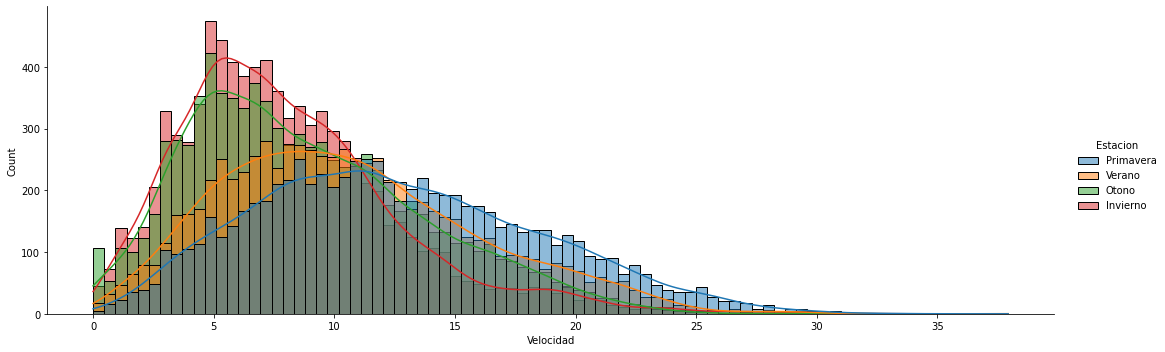

In [61]:

sns.displot(x=data_15min.Velocidad, kde=True, hue=data_15min["Estacion"], aspect=30/10)


In [62]:
data_15min.Velocidad.mean()

9.887917374326705

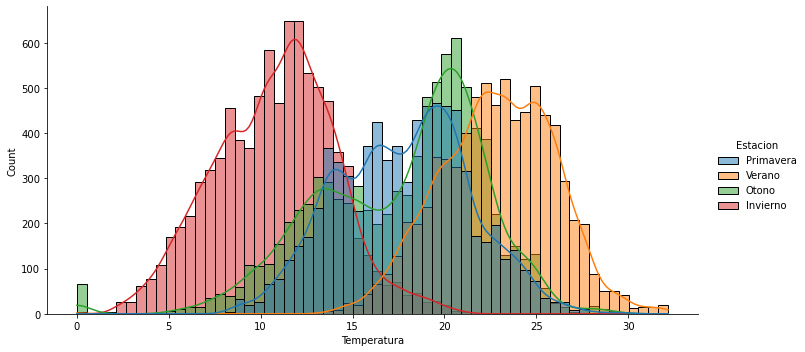

In [63]:
sns.displot(x=data_15min.Temperatura, kde=True, hue=data_15min["Estacion"], aspect=20/10)


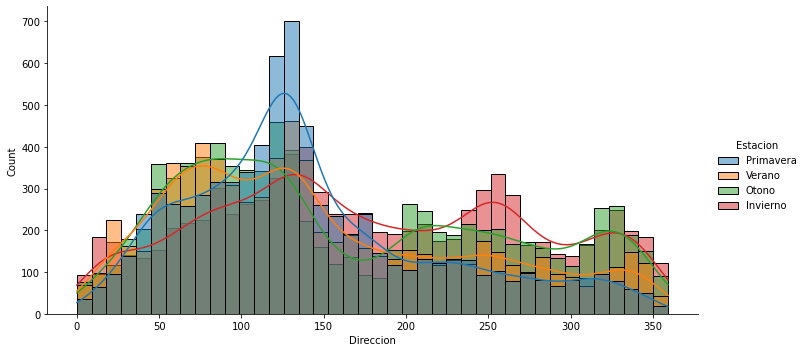

In [64]:
sns.displot(x=data_15min.Direccion, kde=True, hue=data_15min["Estacion"], aspect=20/10)


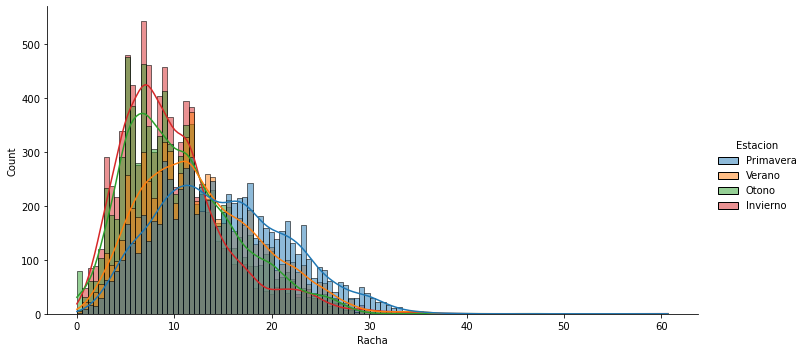

In [65]:
sns.displot(x=data_15min.Racha, kde=True, hue=data_15min["Estacion"], aspect=20/10)


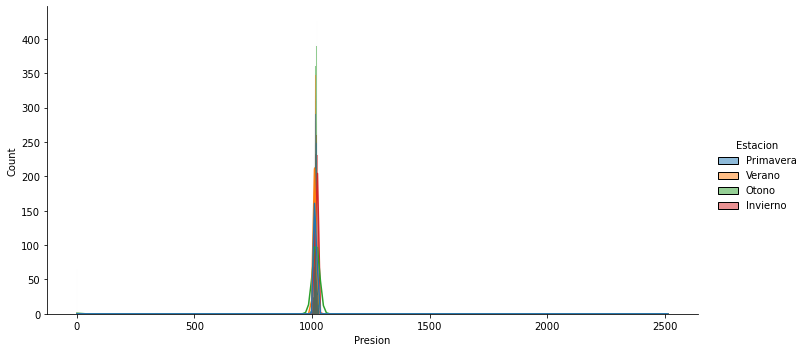

In [66]:
sns.displot(x=data_15min.Presion, kde=True, hue=data_15min["Estacion"], aspect=20/10)


In [67]:
data_15min.groupby(by="Estacion")["Velocidad"].mean()

Estacion
Invierno      8.053129
Otono         8.762835
Primavera    12.587615
Verano       10.593014
Name: Velocidad, dtype: float64

In [68]:
data_15min["Hora"]=data_15min["Time"].dt.hour
data_15min["Hora"]

0        13
1        13
2        14
3        14
4        14
         ..
34364    12
34365    12
34366    13
34367    13
34368    13
Name: Hora, Length: 34369, dtype: int64

###ANALIZAMOS LA FRECUENCIA DE LAS MEDICIONES

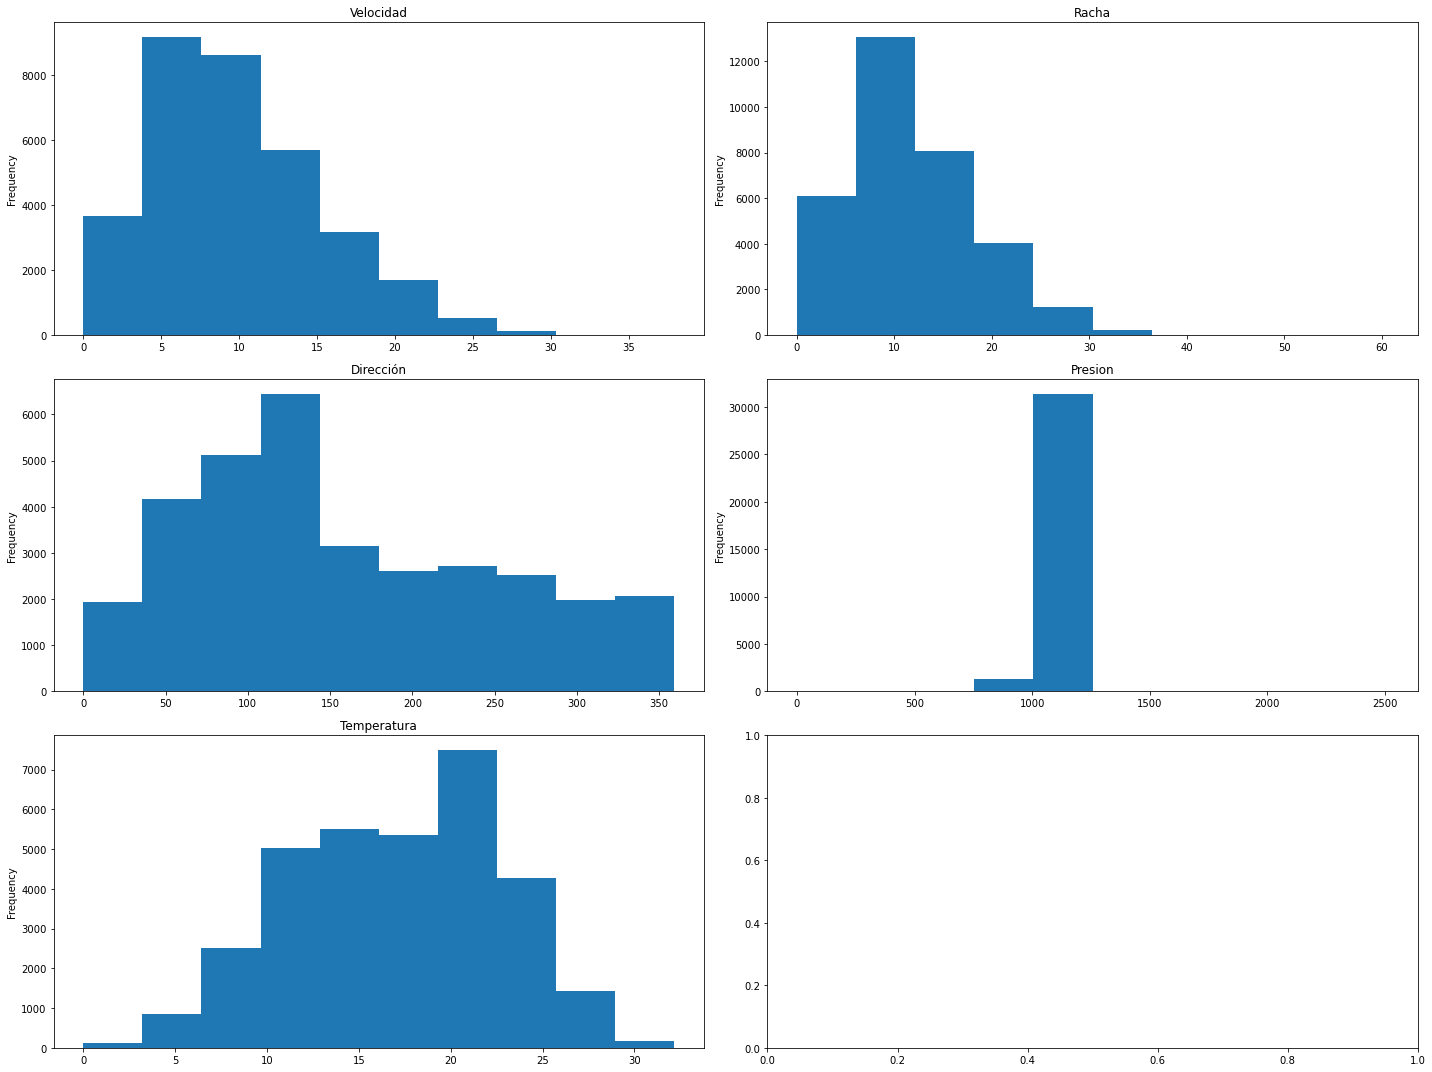

In [69]:
fig,ax=plt.subplots(3,2, figsize=(20,15),sharey=False, sharex=False)
data_15min.Velocidad.plot(kind="hist", ax=ax[0,0], title="Velocidad")
data_15min.Racha.plot(kind="hist", ax=ax[0,1], title="Racha")
data_15min.Direccion.plot(kind="hist", ax=ax[1,0], title="Dirección")
data_15min.Presion.plot(kind="hist", ax=ax[1,1], title="Presion")
data_15min.Temperatura.plot(kind="hist", ax=ax[2,0], title="Temperatura")
fig.tight_layout()


<div class="alert-danger">
### ***OJO HAY VALORES ERRONEOS EN PRESION, HAY QUE ANALIZAR ESA FEATURE
</div>


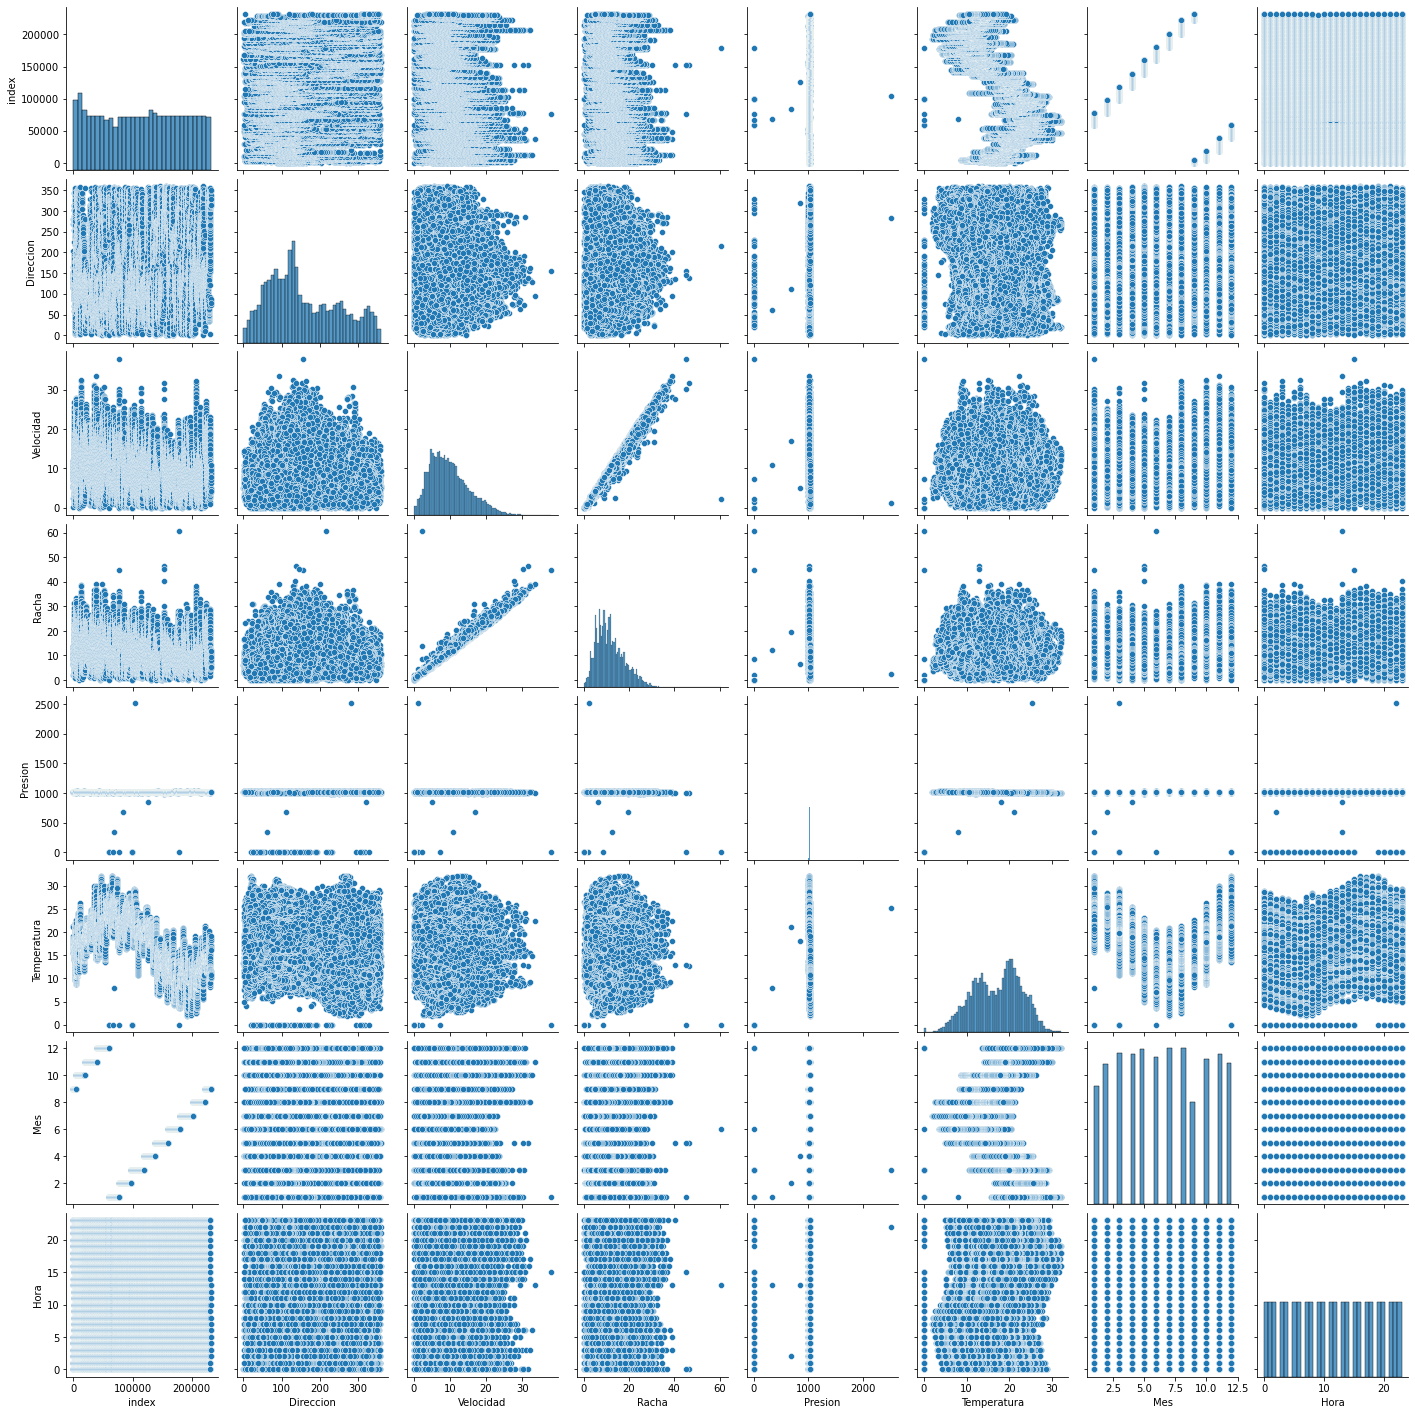

In [70]:
sns.pairplot(data_15min)

  <div class="alert-warning"> 
NO VEO CORRELACION ENTRE LOS DATOS, SALVO VELOCIDAD Y RACHA
</div>  


### CONTROL REGISTROS FALTANTES PRESION ATMOSFERICA

#### CTL REGISTROS MINIMOS

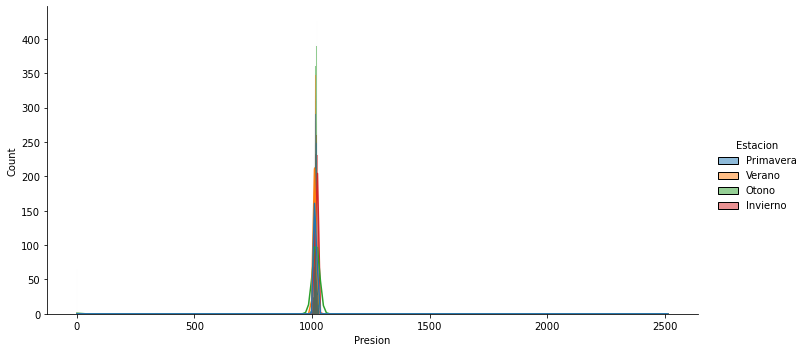

In [71]:
#grafico donde se ven los registros anormales de Presion Atmosferica
sns.displot(x=data_15min.Presion, kde=True, hue=data_15min["Estacion"], aspect=20/10)


In [72]:
#describe del campo Presion
data_15min.Presion.describe()

count    32737.000000
mean      1013.737419
std         48.212054
min          0.000000
25%       1012.188000
50%       1015.740000
75%       1019.656000
max       2513.540000
Name: Presion, dtype: float64

  <div class="alert-warning"> 
La media es correcta, 1013 hp es el valor normal
    
Hay que verificar el desvio std, ver si los valores de la media +/- el std son registros posibles 

</div>  


In [73]:
#mascara para filtrar los registros menor a 900 hp
error_presion_min=900
error_presion_min_mask=data_15min.Presion<900
error_presion_min_data=data_15min[error_presion_min_mask]
error_presion_min_data.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Hora
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,98279.006393,105.924886,1.125616,2.118721,25.589110,0.646347,3.205479,10.095890
std,13389.597970,86.727883,5.062793,9.155400,131.825778,3.349086,1.589540,7.442678
min,59440.000000,19.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,99130.000000,33.666667,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000
50%,99257.500000,77.333333,0.000000,0.000000,0.000000,0.000000,3.000000,8.000000
75%,99384.600000,147.000000,0.000000,0.000000,0.000000,0.000000,3.000000,15.000000
max,178986.000000,328.000000,37.933333,60.666667,850.606667,21.183333,12.000000,23.000000


 <div class="alert-warning"> 
Ver que en los casos de Presion = 0 tambien dan 0 los registros de Velocidad, Racha, Presion, Temperatura
</div>  


In [74]:
#verifico en que fecha se dan los valores con error
error_presion_min_data.Date.value_counts()

2021-03-04    47
2021-03-03    18
2020-12-31     2
2021-01-18     1
2021-02-10     1
2021-01-11     1
2021-01-30     1
2021-04-12     1
2021-06-29     1
Name: Date, dtype: int64

In [75]:
#analizo que pasó en el dia 2021-03-04
data_2021_03_04=data_15min[data_15min.Date==pd.to_datetime("2021-03-04")]
data_2021_03_04.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Hora
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.0,96.000000
mean,99448.831306,105.233559,4.249721,4.895495,369.054369,8.893333,3.0,11.500000
std,170.903542,61.710300,5.722725,6.587216,490.243611,11.815819,0.0,6.958524
min,99174.000000,21.000000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000
25%,99302.725000,43.812500,0.000000,0.000000,0.000000,0.000000,3.0,5.750000
50%,99430.233333,119.416667,0.000000,0.000000,0.000000,0.000000,3.0,11.500000
75%,99601.900000,132.775000,11.405750,12.925000,1010.895000,24.112500,3.0,17.250000
max,99738.166667,305.000000,13.417500,15.800000,1012.458333,25.033333,3.0,23.000000


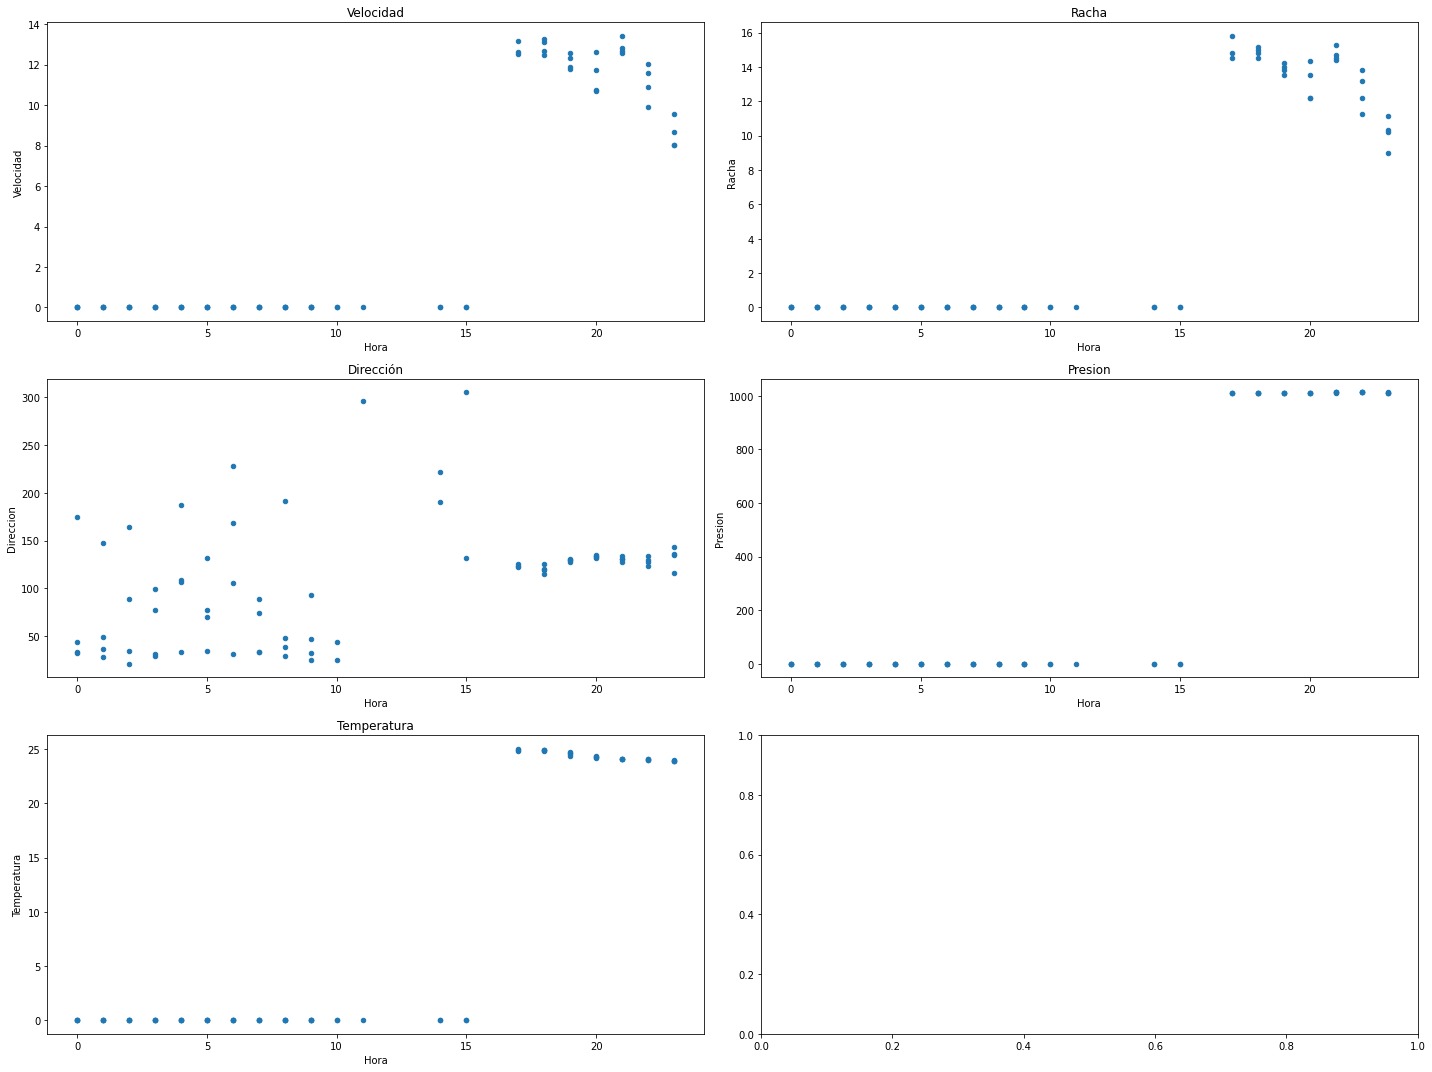

In [76]:
#analisis gráfico del dia 2021-03-04
fig,ax=plt.subplots(3,2, figsize=(20,15),sharey=False, sharex=False)
data_2021_03_04.plot(kind="scatter", ax=ax[0,0], title="Velocidad", x="Hora", y="Velocidad")
data_2021_03_04.plot(kind="scatter", ax=ax[0,1], title="Racha", x="Hora", y="Racha")
data_2021_03_04.plot(kind="scatter", ax=ax[1,0], title="Dirección", x="Hora", y="Direccion")
data_2021_03_04.plot(kind="scatter", ax=ax[1,1], title="Presion", x="Hora", y="Presion")
data_2021_03_04.plot(kind="scatter", ax=ax[2,0], title="Temperatura", x="Hora", y="Temperatura")

fig.tight_layout()

 <div class="alert-warning"> 
el día 2021-03-04 de 0 a 15 hs hubo problemas en las mediciones de todas la variables

</div>  


In [77]:
#analizo que pasó en el dia 2021-03-03
data_2021_03_03=data_15min[data_15min.Date==pd.to_datetime("2021-03-03")]
data_2021_03_03.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Hora
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,96.000000
mean,99047.879902,110.900980,8.859642,10.197059,477.435137,11.772255,3.0,11.500000
std,73.981352,67.450886,9.973219,11.413092,514.011987,12.676531,0.0,6.958524
min,98913.200000,19.250000,0.000000,0.000000,0.000000,0.000000,3.0,0.000000
25%,98989.175000,63.150000,0.000000,0.000000,0.000000,0.000000,3.0,5.750000
50%,99050.666667,126.333333,0.000000,0.000000,0.000000,0.000000,3.0,11.500000
75%,99108.625000,134.650000,16.589375,19.750000,1014.377750,24.910833,3.0,17.250000
max,99166.200000,328.000000,25.068333,28.333333,1015.490000,25.720000,3.0,23.000000


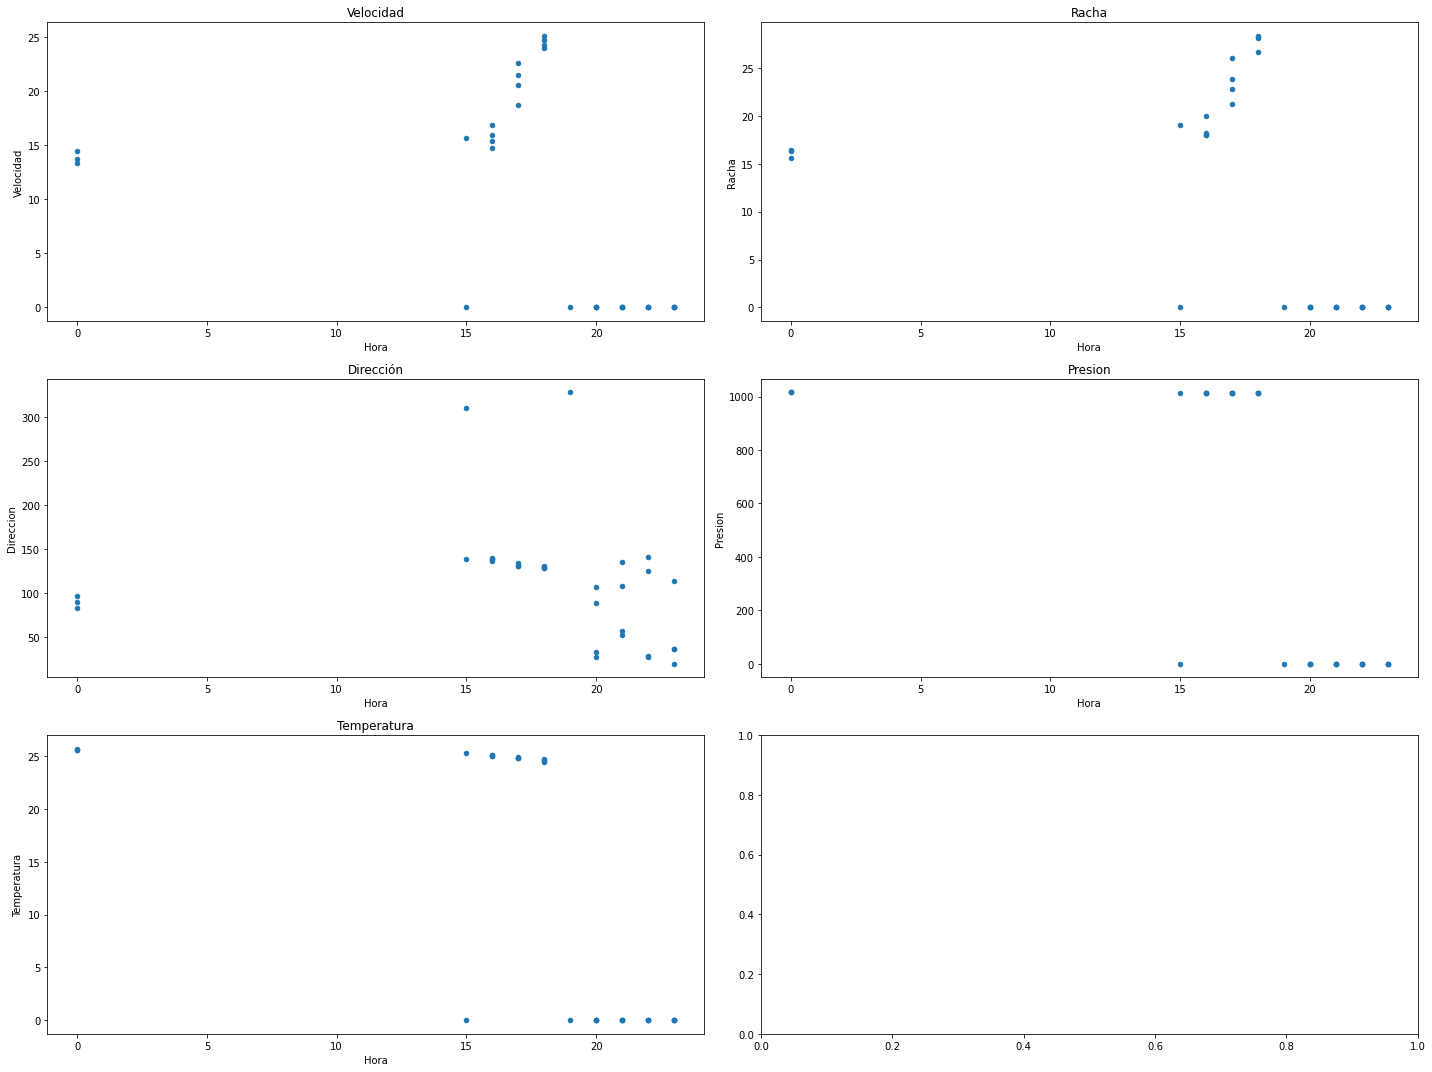

In [78]:
#analisis gráfico del dia 2021-03-03
fig,ax=plt.subplots(3,2, figsize=(20,15),sharey=False, sharex=False)
data_2021_03_03.plot(kind="scatter", ax=ax[0,0], title="Velocidad", x="Hora", y="Velocidad")
data_2021_03_03.plot(kind="scatter", ax=ax[0,1], title="Racha", x="Hora", y="Racha")
data_2021_03_03.plot(kind="scatter", ax=ax[1,0], title="Dirección", x="Hora", y="Direccion")
data_2021_03_03.plot(kind="scatter", ax=ax[1,1], title="Presion", x="Hora", y="Presion")
data_2021_03_03.plot(kind="scatter", ax=ax[2,0], title="Temperatura", x="Hora", y="Temperatura")

fig.tight_layout()

 <div class="alert-warning"> 
el día 2021-03-03 de 0 a 14 hs y de 19 a 24 hubo problemas en las mediciones de todas la variables

</div>  


#### CTL REGISTROS MAXIMOS

In [79]:
#mascara para filtrar los registros MAYOO a 1100 hp
error_presion_max=1050
error_presion_max_mask=data_15min.Presion>error_presion_max
error_presion_max_data=data_15min[error_presion_max_mask]
error_presion_max_data.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Hora
count,1.0,1.0,1.000000,1.00,1.00,1.000000,1.0,1.0
mean,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0
25%,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0
50%,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0
75%,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0
max,104587.0,282.5,1.228333,2.25,2513.54,25.216667,3.0,22.0


In [80]:
#verifico en que fecha se dan los valores con error
error_presion_max_data.Date.value_counts()

2021-03-11    1
Name: Date, dtype: int64

In [81]:
#analizo que pasó en el dia que se manifiesta el error de presion 
data_2021_03_11=data_15min[data_15min.Date==pd.to_datetime("2021-03-11")]
data_2021_03_11.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Hora
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000
mean,104291.218229,210.981597,5.653568,7.050000,1027.533578,24.113490,3.0,11.500000
std,201.786517,122.310999,1.925891,2.147418,153.265756,3.040679,0.0,6.958524
min,103944.600000,2.400000,0.995000,1.166667,1009.783333,19.366667,3.0,0.000000
25%,104120.933333,77.050000,4.622500,5.800000,1010.948583,21.345833,3.0,5.750000
50%,104294.766667,256.100000,5.317500,6.800000,1011.994500,24.315000,3.0,11.500000
75%,104461.400000,303.208333,6.753333,8.250000,1012.832917,26.671667,3.0,17.250000
max,104637.000000,352.750000,9.800000,11.666667,2513.540000,29.120000,3.0,23.000000


In [82]:
pd.set_option('display.max_rows', 500)
data_2021_03_11

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Date,Estacion,Hora
16170,2021-03-11 00:00:00,103944.600000,37.800000,7.786000,9.200000,1010.078000,24.680000,3.0,2021-03-11,Otono,0
16171,2021-03-11 00:15:00,103951.800000,29.000000,8.006000,9.400000,1010.020000,24.400000,3.0,2021-03-11,Otono,0
16172,2021-03-11 00:30:00,103960.200000,30.600000,9.428000,11.200000,1010.030000,24.080000,3.0,2021-03-11,Otono,0
16173,2021-03-11 00:45:00,103967.666667,27.333333,9.330000,11.166667,1009.990000,23.700000,3.0,2021-03-11,Otono,0
16174,2021-03-11 01:00:00,103974.400000,15.000000,6.574000,7.800000,1009.898000,23.040000,3.0,2021-03-11,Otono,1
16175,2021-03-11 01:15:00,103981.666667,27.500000,8.378333,9.666667,1009.901667,23.133333,3.0,2021-03-11,Otono,1
16176,2021-03-11 01:30:00,103989.000000,16.600000,7.894000,9.800000,1009.838000,22.960000,3.0,2021-03-11,Otono,1
16177,2021-03-11 01:45:00,103996.666667,12.166667,6.710000,8.000000,1009.783333,22.666667,3.0,2021-03-11,Otono,1
16178,2021-03-11 02:00:00,104004.000000,3.000000,4.716667,5.833333,1010.003333,22.233333,3.0,2021-03-11,Otono,2
16179,2021-03-11 02:15:00,104011.400000,10.400000,3.938000,5.800000,1010.120000,22.200000,3.0,2021-03-11,Otono,2


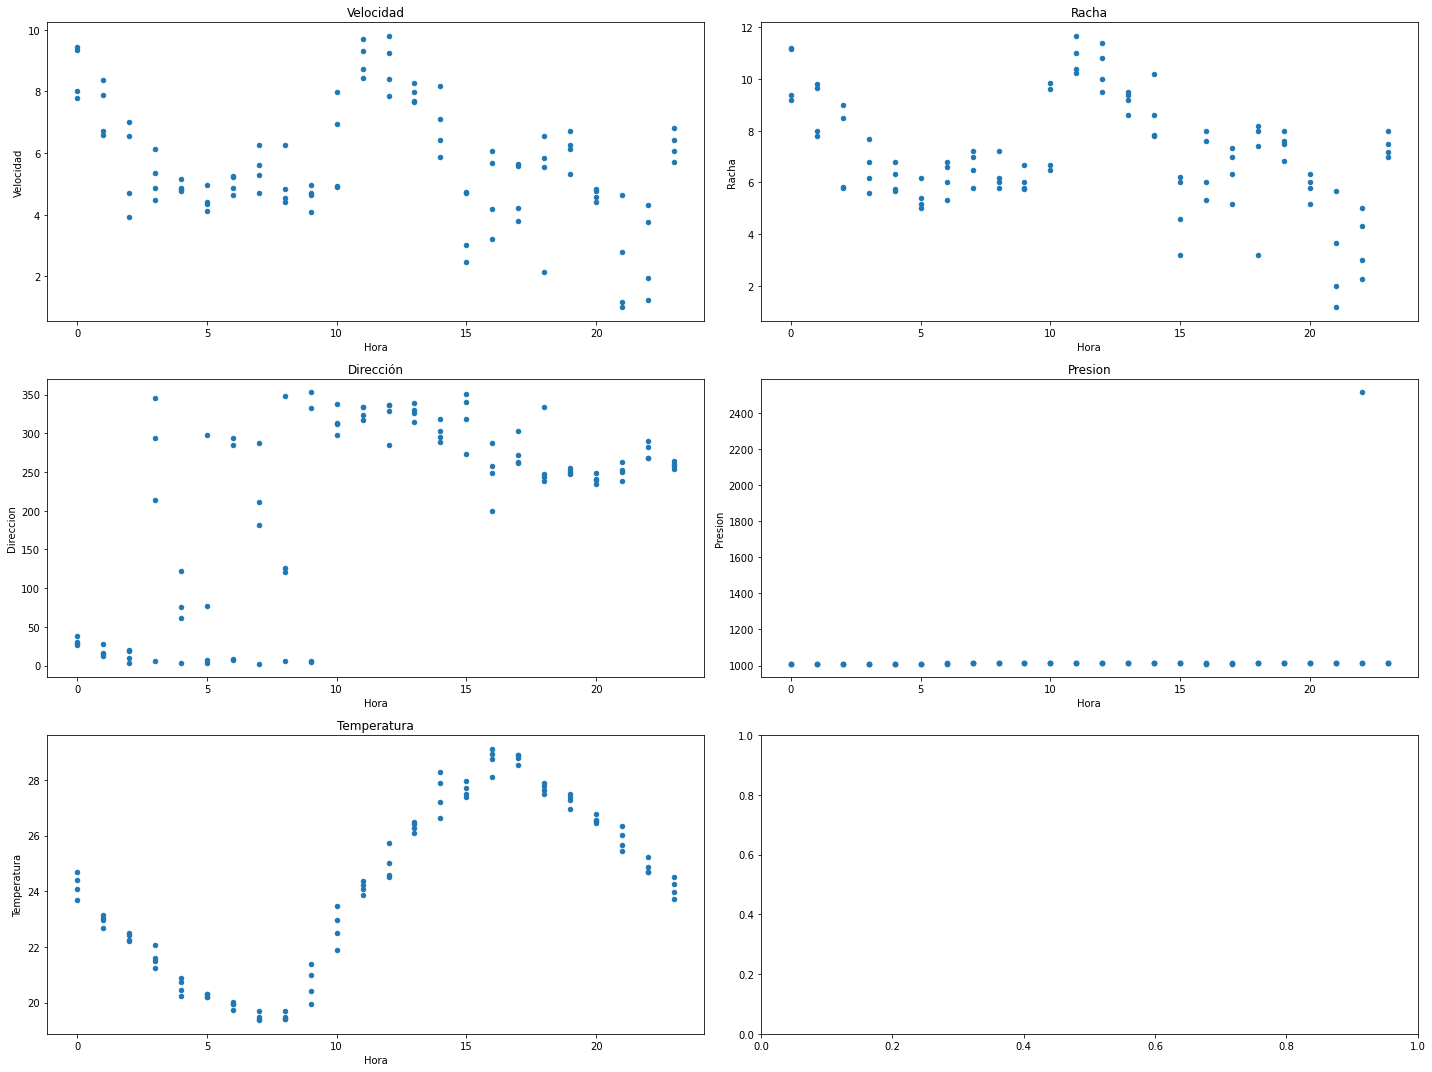

In [84]:
#analisis gráfico del dia 2021-03-11
fig,ax=plt.subplots(3,2, figsize=(20,15),sharey=False, sharex=False)
data_2021_03_11.plot(kind="scatter", ax=ax[0,0], title="Velocidad", x="Hora", y="Velocidad")
data_2021_03_11.plot(kind="scatter", ax=ax[0,1], title="Racha", x="Hora", y="Racha")
data_2021_03_11.plot(kind="scatter", ax=ax[1,0], title="Dirección", x="Hora", y="Direccion")
data_2021_03_11.plot(kind="scatter", ax=ax[1,1], title="Presion", x="Hora", y="Presion")
data_2021_03_11.plot(kind="scatter", ax=ax[2,0], title="Temperatura", x="Hora", y="Temperatura")

fig.tight_layout()

  <div class="alert-warning"> 
En cada hora se ven los 4 puntos de medición (agrupados cada 15 minutos)
    
PRESION:Pareciera que el día en sí no presenta problemas de medición es sólo una medición puntual la que tendría un valor extremo
    
DIRECCION: entre las 3 y las 9 pareciera haber cambios bruscos en la dirección del viento, entre medicion y medicion
    

</div>  


## Viento

In [85]:
import iris
import iris.coord_categorisation
import iris.quickplot as qplt

In [86]:
import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import math
from math import pi

In [87]:
data_15min.head()

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Date,Estacion,Hora
0,2020-09-23 13:30:00,0.0,268.000000,0.070000,2.0,1020.510,21.300000,9.0,2020-09-23,Primavera,13
1,2020-09-23 13:45:00,1.5,279.500000,2.450000,14.0,1020.235,21.300000,9.0,2020-09-23,Primavera,13
2,2020-09-23 14:00:00,4.0,203.333333,6.723333,12.0,1020.230,21.066667,9.0,2020-09-23,Primavera,14
3,2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,NaN,14
4,2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,NaN,14


In [88]:
def func(deg):
    if   deg >=  11.25 and deg <  33.75: return 'NNE'
    elif deg >=  33.75 and deg <  56.25: return 'NE'
    elif deg >=  56.25 and deg <  78.75: return 'ENE'
    elif deg >=  78.75 and deg < 101.25: return 'E'
    elif deg >= 101.25 and deg < 123.75: return 'ESE'
    elif deg >= 123.75 and deg < 146.25: return 'SE'
    elif deg >= 146.25 and deg < 168.75: return 'SSE'
    elif deg >= 168.75 and deg < 191.25: return 'S'
    elif deg >= 191.25 and deg < 213.75: return 'SSW'
    elif deg >= 213.75 and deg < 236.25: return 'SW'
    elif deg >= 236.25 and deg < 258.75: return 'WSW'
    elif deg >= 258.75 and deg < 281.25: return 'W'
    elif deg >= 281.25 and deg < 303.75: return 'WNW'
    elif deg >= 303.75 and deg < 326.25: return 'NW'
    elif deg >= 326.25 and deg < 348.75: return 'NNW'
    elif math.isnan(deg): return math.nan
    else: return 'N'

data_15min['Direction'] = data_15min['Direccion'].apply(func)

In [89]:
data_15min.head()

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Date,Estacion,Hora,Direction
0,2020-09-23 13:30:00,0.0,268.000000,0.070000,2.0,1020.510,21.300000,9.0,2020-09-23,Primavera,13,W
1,2020-09-23 13:45:00,1.5,279.500000,2.450000,14.0,1020.235,21.300000,9.0,2020-09-23,Primavera,13,W
2,2020-09-23 14:00:00,4.0,203.333333,6.723333,12.0,1020.230,21.066667,9.0,2020-09-23,Primavera,14,SSW
3,2020-09-23 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,NaN,14,NaN
4,2020-09-23 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-23,NaN,14,NaN


<AxesSubplot:xlabel='velocidad_x', ylabel='velocidad_y'>

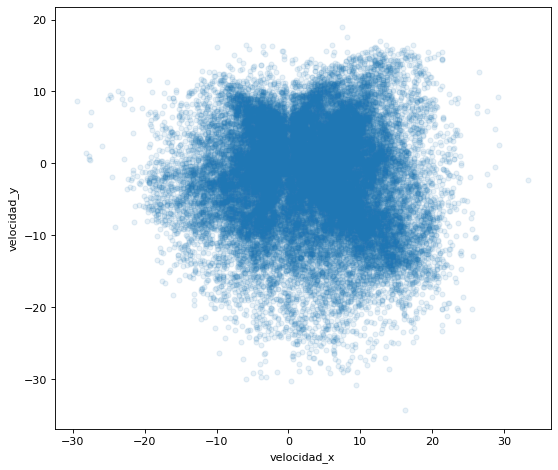

In [91]:
data_15min['velocidad_x'] = data_15min['Velocidad'] * np.sin(data_15min['Direccion'] * pi / 180.0)
data_15min['velocidad_y'] = data_15min['Velocidad'] * np.cos(data_15min['Direccion'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect('equal')
data_15min.plot(kind='scatter', x='velocidad_x', y='velocidad_y', alpha=0.10, ax=ax)

### Windrose in bar and proportional box modes

In [92]:
%%capture
!pip install windrose openpyxl
from windrose import WindroseAxes

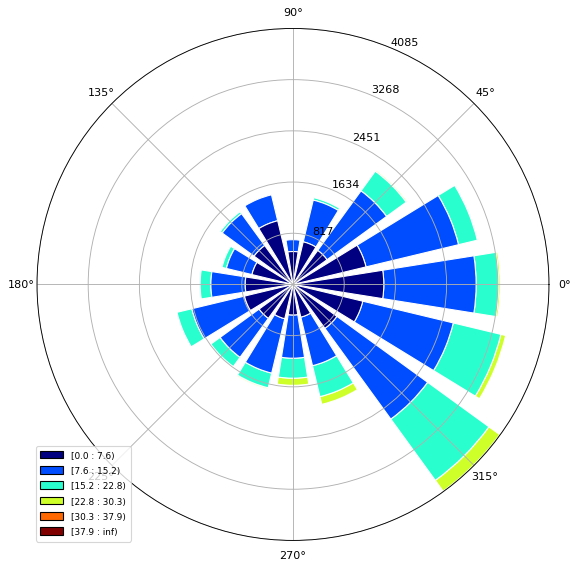

In [308]:
ax = WindroseAxes.from_ax()
ax.bar(data_15min.Direccion, data_15min.Velocidad, normed=False, opening=0.8, edgecolor='white')
ax.set_legend()

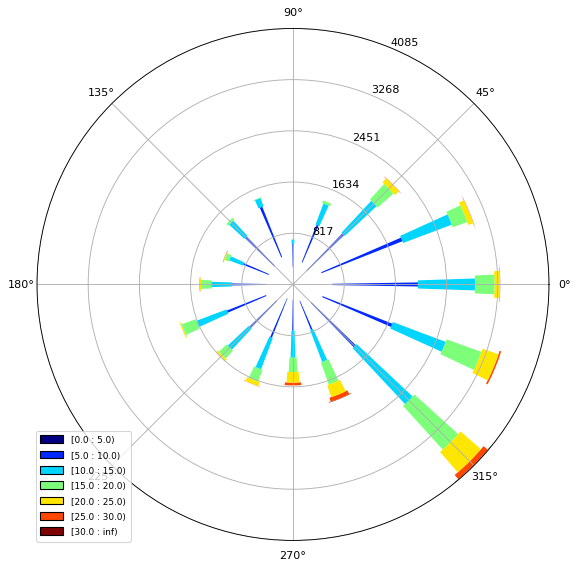

In [94]:
ax = WindroseAxes.from_ax()
ax.box(data_15min.Direccion, data_15min.Velocidad, bins=np.arange(0, 35, 5))
ax.set_legend()

In [309]:
def wind_target(deg):
    if   deg >=  112.5 and deg < 135.0 : return 1
    else: return 0

data_15min['Wind_target']=0
data_15min['Wind_target'] = data_15min['Wind_target'].apply(wind_target)

In [310]:
data_15min['Wind_target'].value_counts()

0    34370
Name: Wind_target, dtype: int64

### TARGET VELOCIDAD

In [110]:
velocidad_target_mask=(data_15min.Velocidad>=16) & (data_15min.Velocidad<=20)
velocidad_target_data_15min=data_15min[velocidad_target_mask]
velocidad_target_data_15min.Velocidad.describe()


count    2978.000000
mean       17.822742
std         1.156209
min        16.000000
25%        16.792500
50%        17.753000
75%        18.793625
max        20.000000
Name: Velocidad, dtype: float64

<div class="alert-warning"> 
Hay 2978 registros donde se da el target de velocidad,   9,17% de los registros totales
    
La media del target es 17.81 knots y el desvio 1,16knots
</div>  


In [116]:
#uso la mascara de velocidad_target para crear y completar la columna con el valor 1
data_15min.loc[velocidad_target_mask,"Velocidad_target"]=1
data_15min.head(3)

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Date,Estacion,Hora,Direction,velocidad_x,velocidad_y,Wind_target,Velocidad_target
0,2020-09-23 13:30:00,0.0,268.000000,0.070000,2.0,1020.510,21.300000,9.0,2020-09-23,Primavera,13,W,-0.069957,-0.002443,0,NaN
1,2020-09-23 13:45:00,1.5,279.500000,2.450000,14.0,1020.235,21.300000,9.0,2020-09-23,Primavera,13,W,-2.416400,0.404367,0,NaN
2,2020-09-23 14:00:00,4.0,203.333333,6.723333,12.0,1020.230,21.066667,9.0,2020-09-23,Primavera,14,SSW,-2.662976,-6.173473,0,NaN


In [125]:
#completo los nulos que quedaron del paso anterior
data_15min["Velocidad_target"].fillna(value=0, inplace=True)
data_15min["Velocidad_target"].value_counts()

0.0    31391
1.0     2978
Name: Velocidad_target, dtype: int64

In [127]:
data_15min["Velocidad_target"].value_counts(normalize=True)

0.0    0.913352
1.0    0.086648
Name: Velocidad_target, dtype: float64

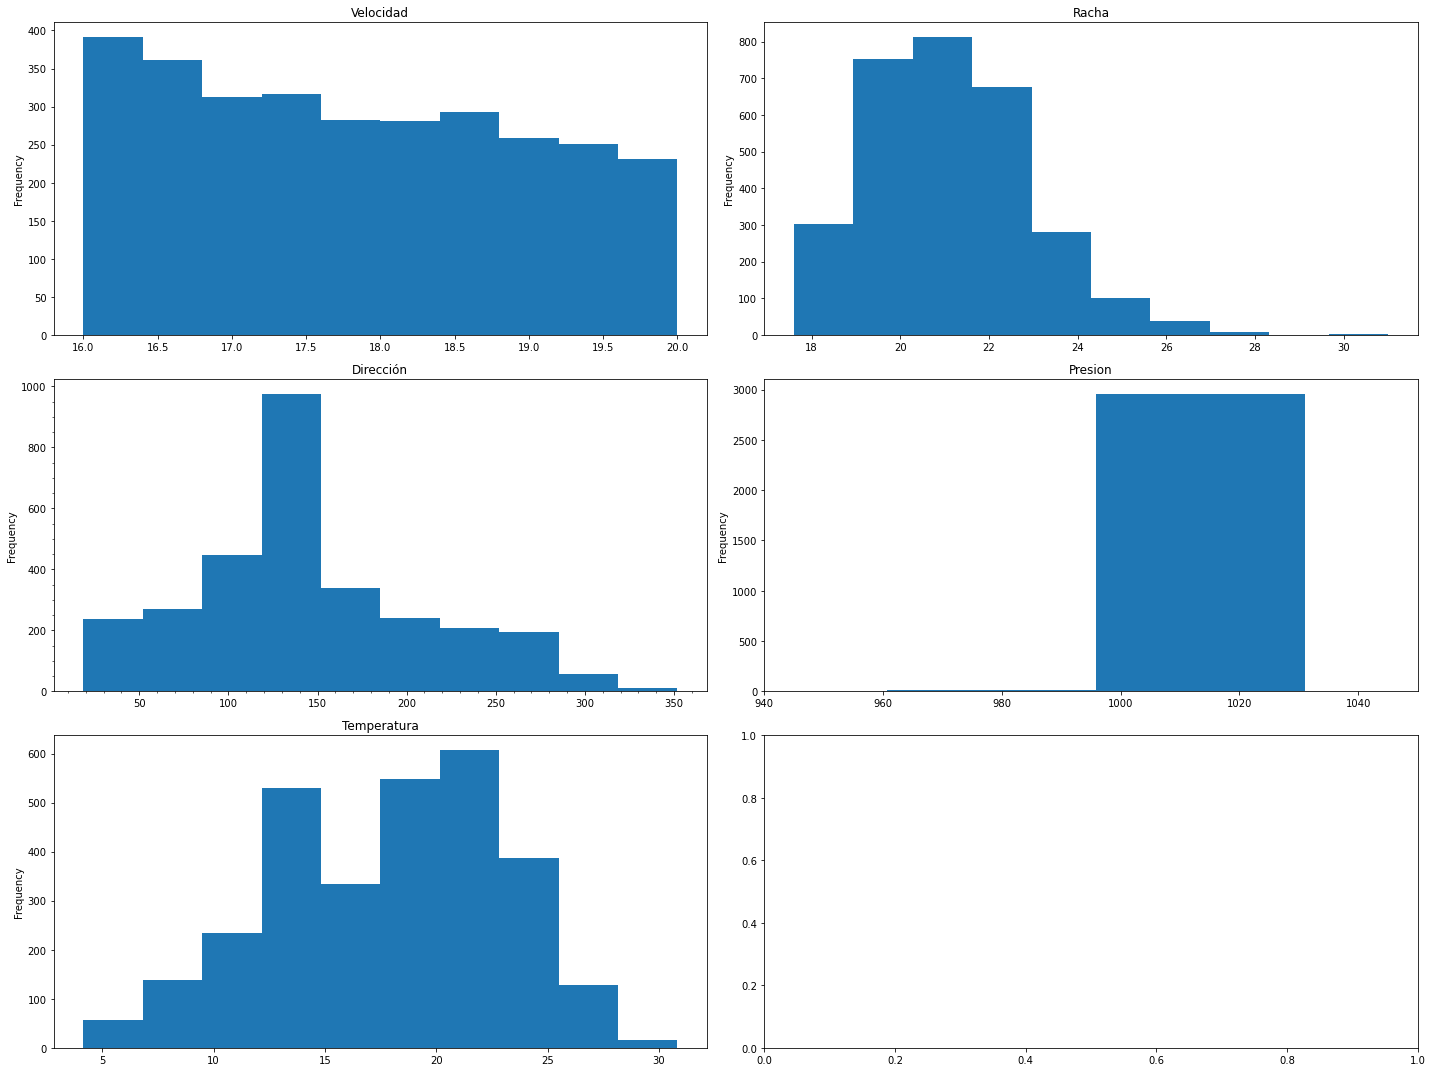

In [153]:
data_target=data_15min[data_15min.Velocidad_target==1]
fig,ax=plt.subplots(3,2, figsize=(20,15),sharey=False, sharex=False)
data_target.Velocidad.plot(kind="hist", ax=ax[0,0], title="Velocidad")
data_target.Racha.plot(kind="hist", ax=ax[0,1], title="Racha")
data_target.Direccion.plot(kind="hist", ax=ax[1,0], title="Dirección")
data_target.Presion.plot(kind="hist", ax=ax[1,1], title="Presion")
data_target.Temperatura.plot(kind="hist", ax=ax[2,0], title="Temperatura")
#data_target.Estacion.plot(kind="scatter", ax=ax[2,1], title="Estacion")
ax[1,1].set_xlim(940, 1050)
ax[1,0].minorticks_on()
fig.tight_layout()

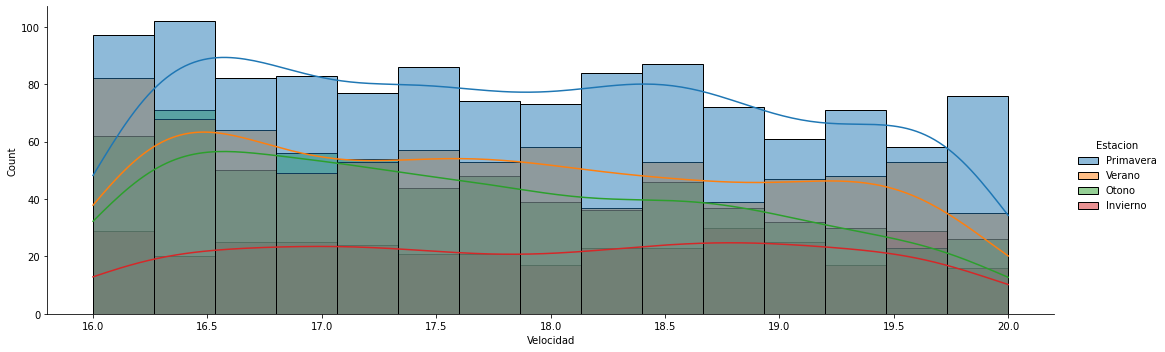

In [129]:
sns.displot(x=data_target.Velocidad, kde=True, hue=data_target["Estacion"], aspect=30/10)


### TARGET DIRECCION

In [131]:
direccion_target_mask=(data_15min.Direccion>=112.5) & (data_15min.Direccion<=135)
direccion_target_data_15min=data_15min[direccion_target_mask]
direccion_target_data_15min.Direccion.describe()


count    4417.000000
mean      124.567489
std         6.267650
min       112.500000
25%       119.500000
50%       124.800000
75%       130.000000
max       135.000000
Name: Direccion, dtype: float64

<div class="alert-warning"> 
Hay 4417 registros donde se da el target de velocidad,   13% de los registros totales
    
La media del target es 124.56 knots y el desvio 6,26 knots
</div>  


In [132]:
#uso la mascara de direccion_target para crear y completar la columna con el valor 1
data_15min.loc[direccion_target_mask,"Direccion_target"]=1
data_15min.head(3)

,Time,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Date,Estacion,Hora,Direction,velocidad_x,velocidad_y,Wind_target,Velocidad_target,Direccion_target
0,2020-09-23 13:30:00,0.0,268.000000,0.070000,2.0,1020.510,21.300000,9.0,2020-09-23,Primavera,13,W,-0.069957,-0.002443,0,0.0,NaN
1,2020-09-23 13:45:00,1.5,279.500000,2.450000,14.0,1020.235,21.300000,9.0,2020-09-23,Primavera,13,W,-2.416400,0.404367,0,0.0,NaN
2,2020-09-23 14:00:00,4.0,203.333333,6.723333,12.0,1020.230,21.066667,9.0,2020-09-23,Primavera,14,SSW,-2.662976,-6.173473,0,0.0,NaN


In [133]:
#completo los nulos que quedaron del paso anterior
data_15min["Direccion_target"].fillna(value=0, inplace=True)
data_15min["Direccion_target"].value_counts()

0.0    29952
1.0     4417
Name: Direccion_target, dtype: int64

In [134]:
data_15min["Direccion_target"].value_counts(normalize=True)

0.0    0.871483
1.0    0.128517
Name: Direccion_target, dtype: float64

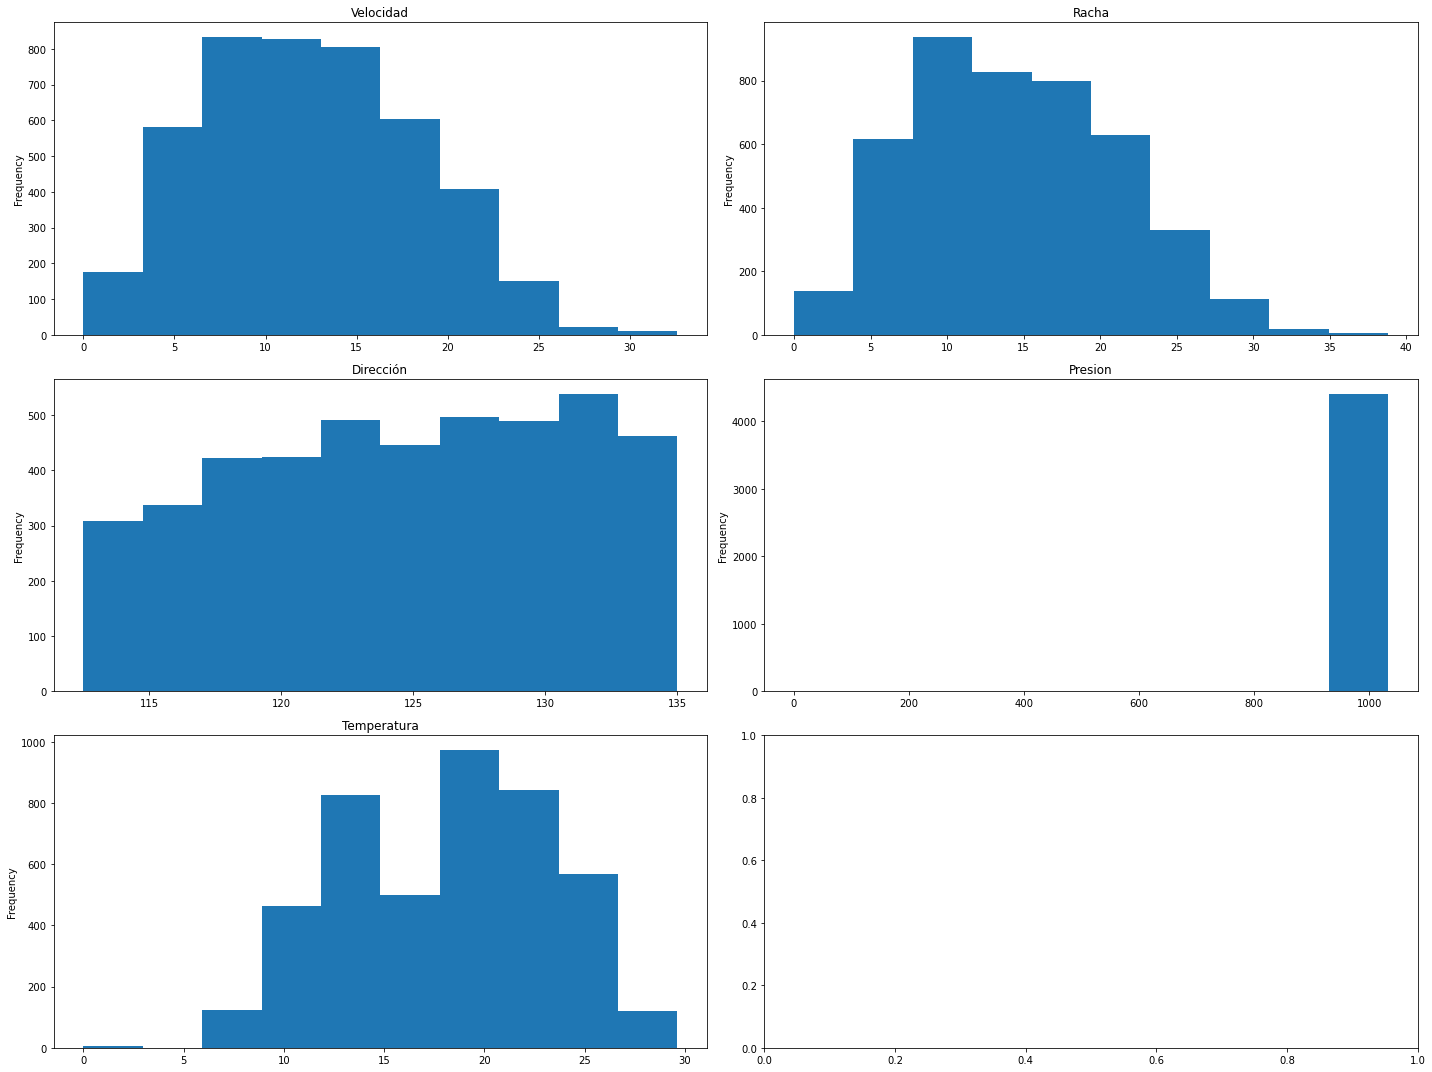

In [135]:
data_target_direccion=data_15min[data_15min.Direccion_target==1]
fig,ax=plt.subplots(3,2, figsize=(20,15),sharey=False, sharex=False)
data_target_direccion.Velocidad.plot(kind="hist", ax=ax[0,0], title="Velocidad")
data_target_direccion.Racha.plot(kind="hist", ax=ax[0,1], title="Racha")
data_target_direccion.Direccion.plot(kind="hist", ax=ax[1,0], title="Dirección")
data_target_direccion.Presion.plot(kind="hist", ax=ax[1,1], title="Presion")
data_target_direccion.Temperatura.plot(kind="hist", ax=ax[2,0], title="Temperatura")
#data_target.Estacion.plot(kind="scatter", ax=ax[2,1], title="Estacion")
fig.tight_layout()

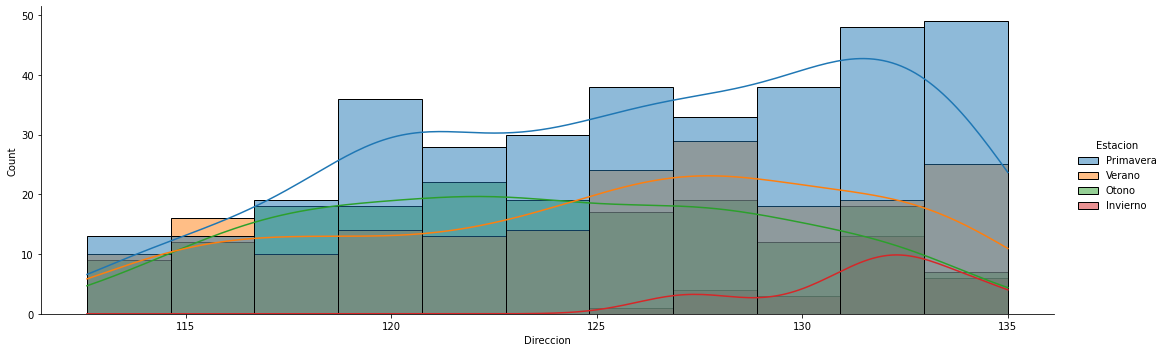

In [311]:
sns.displot(x=data_target_direccion.Direccion, kde=True, hue=data_target["Estacion"], aspect=30/10)


### TARGET DIRECCION-VELOCIDAD

In [172]:
all_target_mask=(data_15min.Direccion_target==1) & (data_15min.Velocidad_target==1)
all_target_data_15min=data_15min[all_target_mask]
all_target_data_15min.describe()

,index,Direccion,Velocidad,Racha,Presion,Temperatura,Mes,Hora,velocidad_x,velocidad_y,Wind_target,Velocidad_target,Direccion_target,Ctl,Target
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0,735.0,735.0,735.0,735.0
mean,97755.299592,125.495420,17.861371,20.524943,1015.154649,19.080673,6.836735,16.567347,14.450171,-10.328802,0.0,1.0,1.0,2.0,0.0
std,72209.300552,6.058163,1.132086,1.349465,3.947919,4.381779,3.869184,6.133663,1.300743,1.769601,0.0,0.0,0.0,0.0,0.0
min,563.500000,112.600000,16.000000,17.800000,999.254000,10.160000,1.000000,0.000000,11.449473,-13.948094,0.0,1.0,1.0,2.0,0.0
25%,31925.800000,120.500000,16.860000,19.500000,1012.533667,14.225000,3.000000,15.000000,13.491223,-11.674145,0.0,1.0,1.0,2.0,0.0
50%,84593.600000,126.250000,17.826000,20.500000,1015.802500,20.133333,9.000000,19.000000,14.447189,-10.463214,0.0,1.0,1.0,2.0,0.0
75%,151391.466667,131.000000,18.790000,21.600000,1018.109250,21.880000,11.000000,21.000000,15.385529,-8.910097,0.0,1.0,1.0,2.0,0.0
max,229730.400000,135.000000,19.994000,25.500000,1029.948333,27.740000,12.000000,23.000000,18.094498,-6.243262,0.0,1.0,1.0,2.0,0.0


In [232]:
data_15min.loc[:,"Target"]=np.nan
data_15min.loc[all_target_mask,"Target"]=data_15min.loc[all_target_mask,"Target"].apply(lambda x: 1)
data_15min["Target"].fillna(value=0, inplace=True)
data_15min["Target"].value_counts()

0.0    33635
1.0      735
Name: Target, dtype: int64

<div class="alert-warning"> 
Hay solo 735 registros donde se da la condicion de viento y dirección, es solo el 2% del total de registros ***revisar este tema porque no me suena que sean tan poco***
</div>  

In [192]:
data_15min["Ctl"]=data_15min.Direccion_target +data_15min.Velocidad_target
data_15min["Ctl"].value_counts()

0.0    27710
1.0     5925
2.0      735
Name: Ctl, dtype: int64

In [241]:
all_target_data_15min.Date.value_counts()

2021-09-07    41
2021-09-03    39
2021-02-10    32
2021-05-21    32
2020-11-19    31
2021-03-12    23
2020-11-11    22
2021-07-14    22
2021-01-08    20
2021-09-06    19
2021-03-01    17
2020-11-30    17
2021-05-19    17
2021-01-04    16
2020-09-24    16
2021-04-03    14
2021-04-01    13
2021-02-11    12
2020-11-07    12
2021-01-31    12
2020-09-26    10
2021-03-02    10
2020-11-03    10
2020-11-20    10
2020-11-02    10
2020-11-05    10
2020-12-27    10
2021-05-20    10
2021-03-21     9
2020-12-07     9
2021-03-19     9
2020-11-12     9
2020-12-06     9
2021-02-26     8
2020-11-10     7
2021-09-05     7
2020-10-22     7
2021-02-12     7
2020-11-09     7
2020-11-13     7
2021-01-03     6
2021-04-02     6
2020-11-01     6
2020-11-08     5
2021-01-20     5
2021-09-13     5
2021-01-09     5
2020-11-22     5
2020-10-19     4
2021-07-24     4
2020-12-26     4
2021-09-04     4
2021-01-23     4
2021-01-21     4
2021-02-22     4
2021-01-10     3
2020-11-04     3
2021-04-10     3
2020-10-03    

In [242]:
all_target_data_15min.Date.value_counts().shape

(89,)

  <div class="alert-warning"> 
hay 89 dias donde la condicion se da en al menos un registro
</div>  


In [257]:
target_dates_over_4=pd.DataFrame(all_target_data_15min.Date.value_counts(), columns=["Date"])
target_dates_over_4.reset_index(inplace=True)
target_dates_over_4.rename(columns={"index":"Date", "Date":"Count"}, inplace=True)
target_dates_over_4[target_dates_over_4["Count"]>4].shape

(48, 2)

  <div class="alert-warning"> 
hay 48 dias donde la condicion se da en al menos 4 registros (1 hora) por dia, hay que analizar si esos registros son consecutivos
    </div>  

#### ANALIZO UN PAR DE DIAS DONDE SE DA EL TARGET PARA VER EL COMPORTAMIENTO

In [261]:
date_2021_09_07=data_15min[data_15min.Date==pd.to_datetime("2021-09-07")]

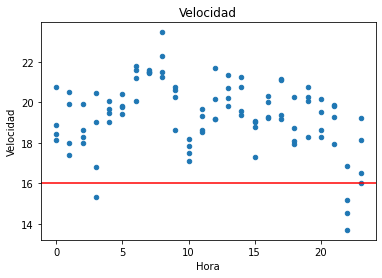

In [288]:
date_2021_09_07.plot(kind="scatter", title="Velocidad", x="Hora", y="Velocidad")
plt.axhline(y = 16, color = 'r', linestyle = '-')

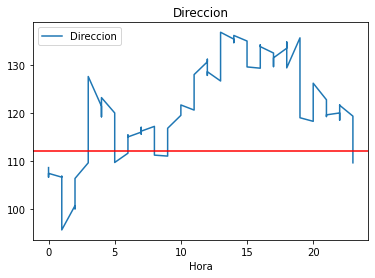

In [290]:
date_2021_09_07.plot( title="Direccion", x="Hora", y="Direccion")
plt.axhline(y = 112, color = 'r', linestyle = '-')

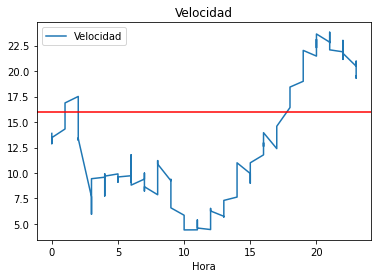

In [291]:
date_2021_01_03.plot(kind="line",  title="Velocidad", x="Hora", y="Velocidad")
plt.axhline(y = 16, color = 'r', linestyle = '-')

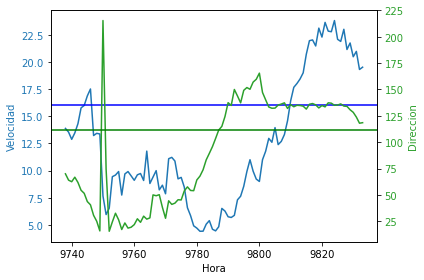

In [305]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("Hora")
ax1.set_ylabel('Velocidad', color=color)
ax1.plot(date_2021_01_03['Velocidad'] ,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y = 16, color = 'b', linestyle = '-')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Direccion', color=color)  # we already handled the x-label with ax1
ax2.plot(date_2021_01_03["Direccion"], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(y = 112, color = 'g', linestyle = '-')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()